In [6]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt



# matplotlib image size and resolution
mpl_options = {"figsize":(10,10)}
sb.set(rc={'figure.figsize':(12,8)})

from inspect import signature as sig

### Загрузим датасет

In [7]:
from sklearn import datasets

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target
X.info(), y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(None,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

### Дерево решений ищется при помощи команды DecisionTreeClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
sig(DecisionTreeClassifier)

<Signature (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)>

In [9]:
model = DecisionTreeClassifier(max_depth = 2)

In [10]:
model.fit(X.values,y)
model.predict([[1,2,3,4]])

array([2])

In [11]:
from sklearn.tree import export_graphviz
sig(export_graphviz)

<Signature (decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')>

In [12]:
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [13]:
#!brew install graphviz

In [14]:
!dot -Tpng tree.dot -o tree.png

In [15]:
#!pip install opencv-python

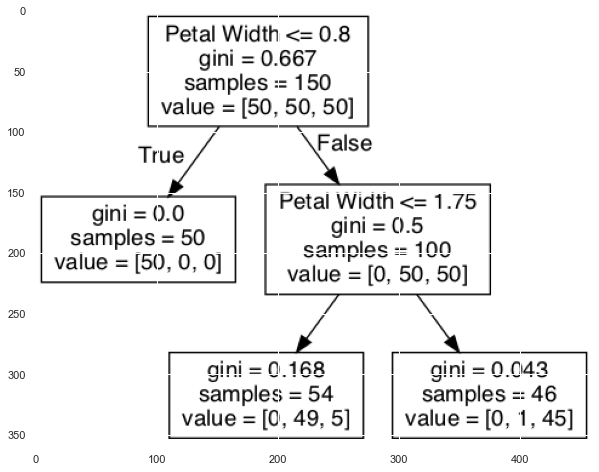

In [16]:
import cv2

img = cv2.imread('tree.png')
plt.imshow(img)

### Посмотрим, насколько это правдоподобно...

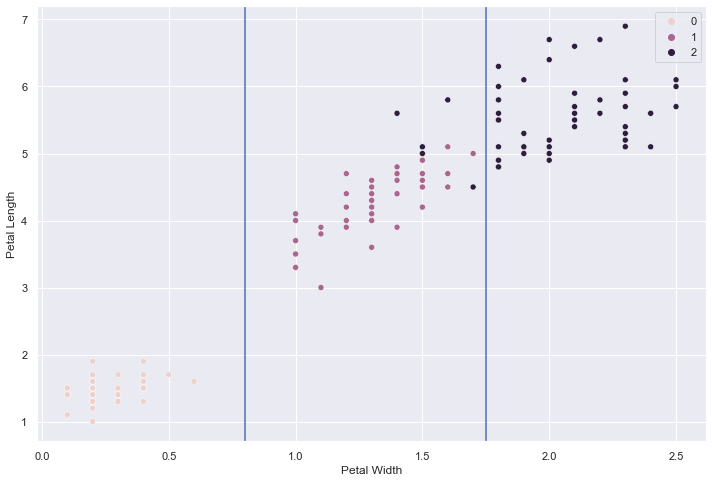

In [17]:
sb.scatterplot(x = 'Petal Width', y = 'Petal Length', data = X, hue = y)
plt.axvline(x=.8)
plt.axvline(x=1.75)

### Попробуем сделать дерево подлиннее...

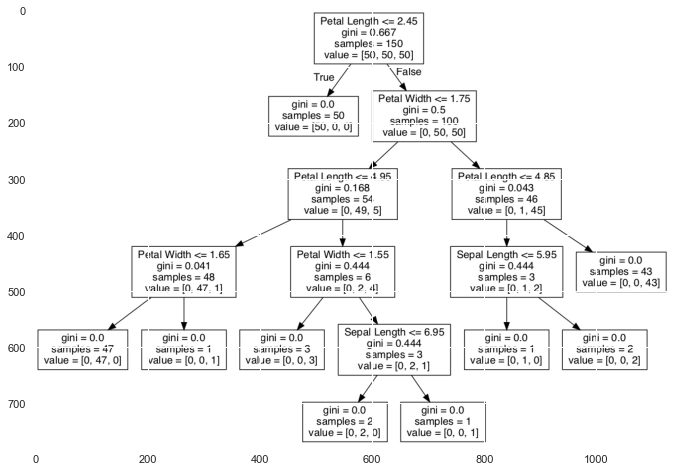

In [18]:
model = DecisionTreeClassifier()
model.fit(X,y)
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)
!dot -Tpng tree.dot -o tree.png
img = cv2.imread('tree.png')
plt.imshow(img)

### Попробуем убрать Sepal Width и Petal Width

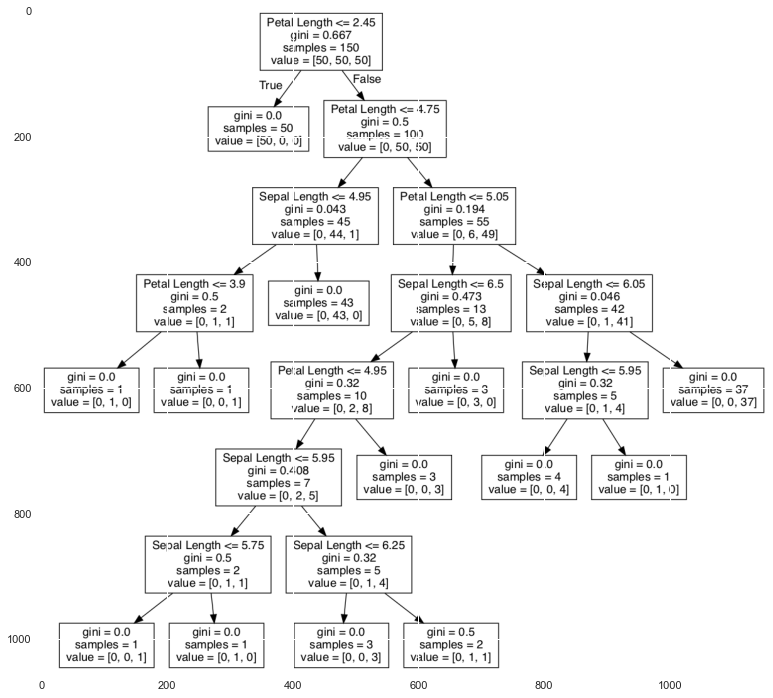

In [19]:
XX = X[['Petal Length','Sepal Length']]

model = DecisionTreeClassifier()
model.fit(XX,y)
export_graphviz(model, 'tree.dot', feature_names = ['Petal Length','Sepal Length'])
!dot -Tpng tree.dot -o tree.png
img = cv2.imread('tree.png')
plt.figure(figsize = (13,13))
plt.imshow(img)

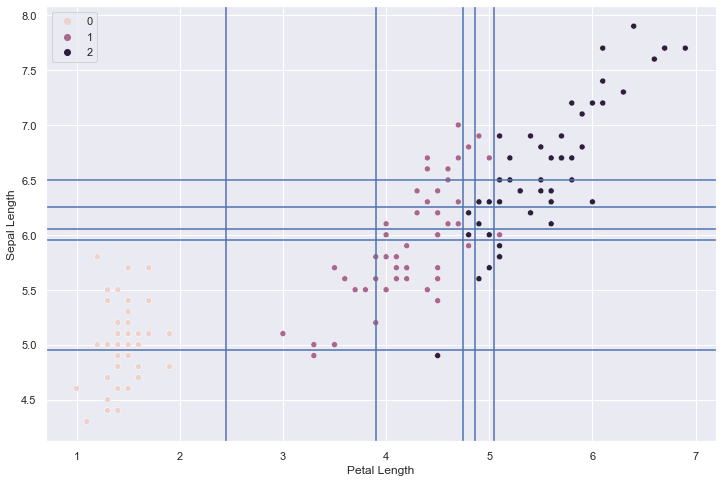

In [20]:
sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

plt.axvline(x=2.45)
plt.axvline(x=4.75)
plt.axvline(x=5.05)
plt.axhline(y=4.95)
plt.axhline(y=6.5)
plt.axhline(y=6.05)
plt.axvline(x=3.9)
plt.axvline(x=4.86)
plt.axhline(y=6.25)
plt.axhline(y=5.95)

In [21]:
model.fit(XX.values,y)

points = np.random.randint(100,800,size=(10000,2))/100

answers = model.predict(points).reshape(10000,1)
stack = np.hstack((points, answers))

s0 = np.array([i[:2] for i in stack  if i[2] == 0])
s1 = np.array([i[:2] for i in stack  if i[2] == 1])
s2 = np.array([i[:2] for i in stack  if i[2] == 2])

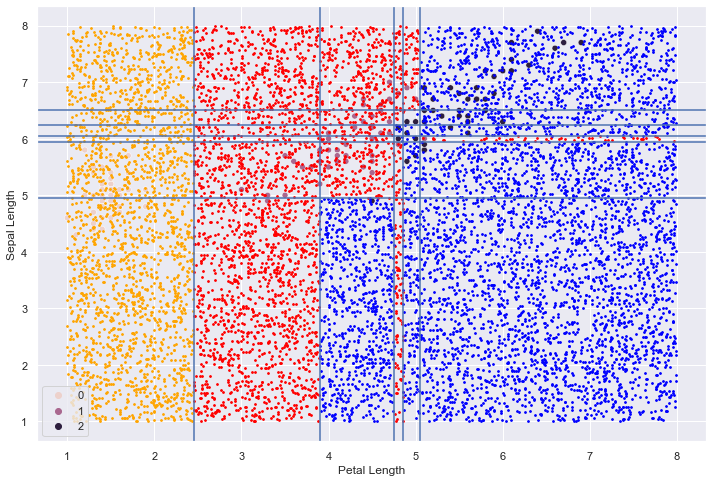

In [22]:
sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

plt.axvline(x=2.45)
plt.axvline(x=4.75)
plt.axvline(x=5.05)
plt.axhline(y=4.95)
plt.axhline(y=6.5)
plt.axhline(y=6.05)
plt.axvline(x=3.9)
plt.axvline(x=4.86)
plt.axhline(y=6.25)
plt.axhline(y=5.95)

plt.scatter(s0[:,0], s0[:,1] , color = 'orange', s = 3)
plt.scatter(s1[:,0], s1[:,1] , color = 'red', s = 3)
plt.scatter(s2[:,0], s2[:,1] , color = 'blue', s = 3)

### Какие признаки оверфита вы тут видите? Предложите решение

### Попробуем еще раз

In [25]:
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
XX = X[['Petal Length','Sepal Length']]

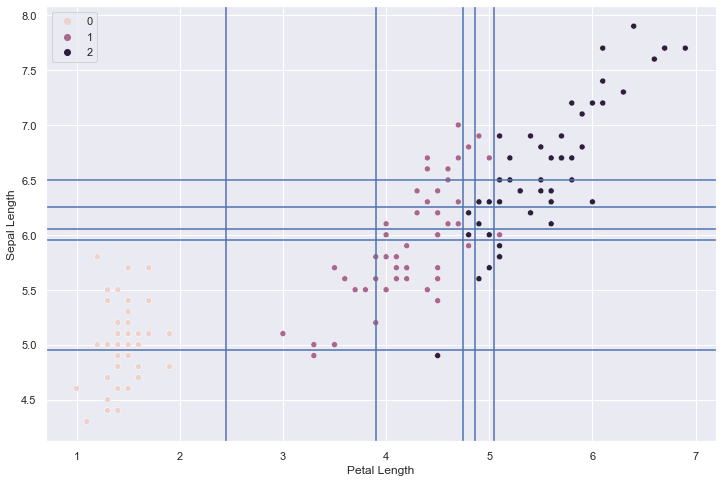

In [26]:
def show(XX, y):
    sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

    plt.axvline(x=2.45)
    plt.axvline(x=4.75)
    plt.axvline(x=5.05)
    plt.axhline(y=4.95)
    plt.axhline(y=6.5)
    plt.axhline(y=6.05)
    plt.axvline(x=3.9)
    plt.axvline(x=4.86)
    plt.axhline(y=6.25)
    plt.axhline(y=5.95)
    
show(XX, y)

### Обернем в функцию

In [68]:
def draw(XX, model, y):
    points = np.random.randint(100,800,size=(10000,2))/100
    answers = model.predict(points).reshape(10000,1)
    stack = np.hstack((points, answers))

    s0 = np.array([i[:2] for i in stack  if i[2] == 0])
    s1 = np.array([i[:2] for i in stack  if i[2] == 1])
    s2 = np.array([i[:2] for i in stack  if i[2] == 2])

    sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

    plt.axvline(x=2.45)
    plt.axvline(x=4.75)
    plt.axvline(x=5.05)
    plt.axhline(y=4.95)
    plt.axhline(y=6.5)
    plt.axhline(y=6.05)
    plt.axvline(x=3.9)
    plt.axvline(x=4.86)
    plt.axhline(y=6.25)
    plt.axhline(y=5.95)

    plt.scatter(s0[:,0], s0[:,1] , color = 'orange', s = 3)
    plt.scatter(s1[:,0], s1[:,1] , color = 'red', s = 3)
    plt.scatter(s2[:,0], s2[:,1] , color = 'blue', s = 3)

/Users/pasha/Documents/Conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


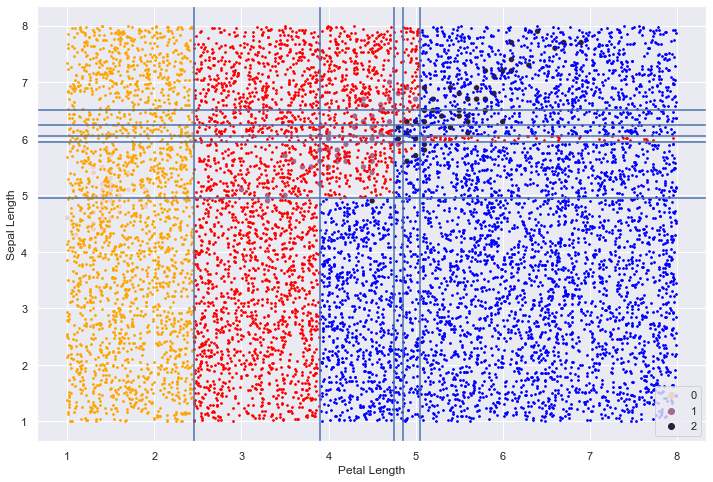

In [69]:
model = DecisionTreeClassifier()
model.fit(XX, y)
draw(XX, model, y)

/Users/pasha/Documents/Conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


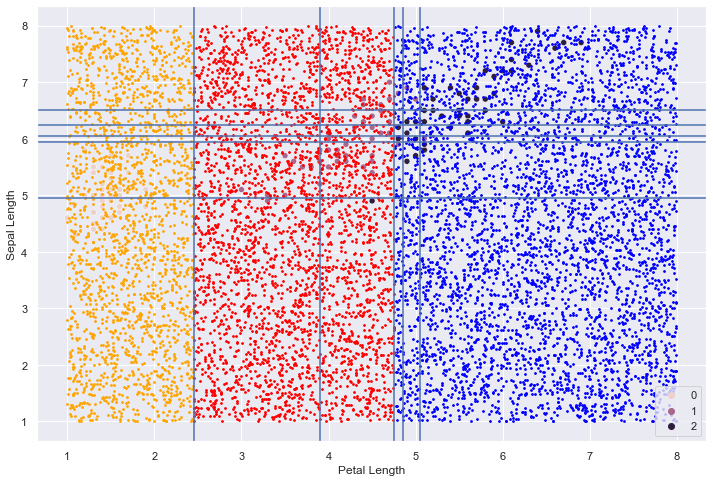

In [70]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(XX, y)
draw(XX, model, y)

/Users/pasha/Documents/Conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


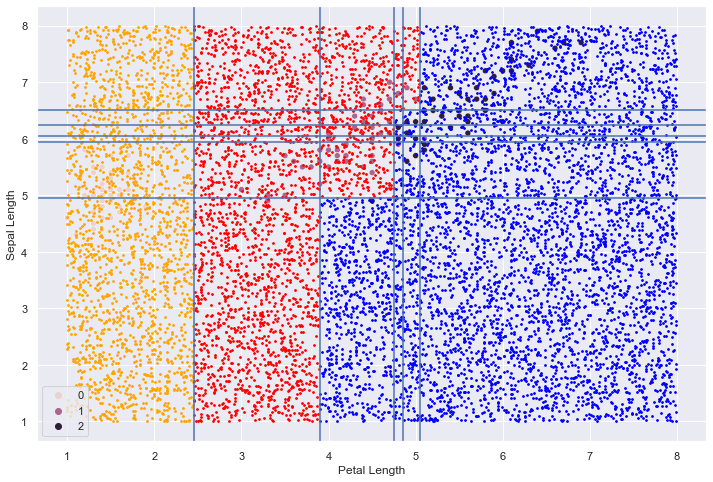

In [71]:
model = DecisionTreeClassifier(max_depth = 4)
model.fit(XX, y)
draw(XX, model, y)

### Первый способ избежать оверфита это просто держать дерево покороче

### Второй способ это избавиться от аутлаеров, например, перекрасить через KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier as KNC
nbrs_clf = KNC(n_neighbors = 3).fit(XX, y)

In [73]:
yy = nbrs_clf.predict(XX)

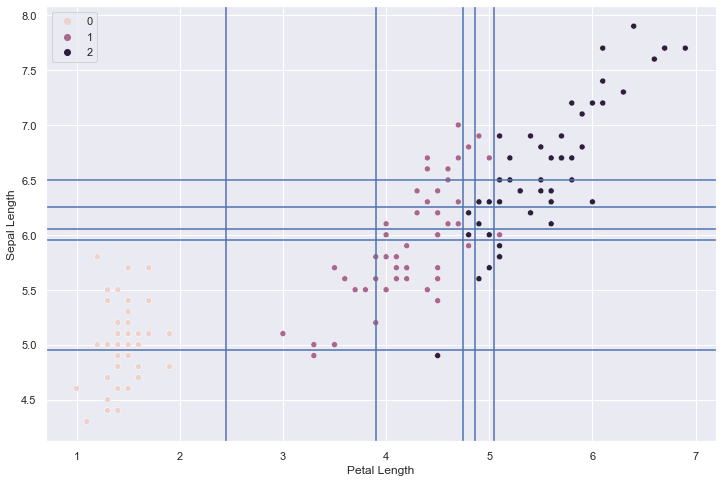

In [74]:
show(XX, y)

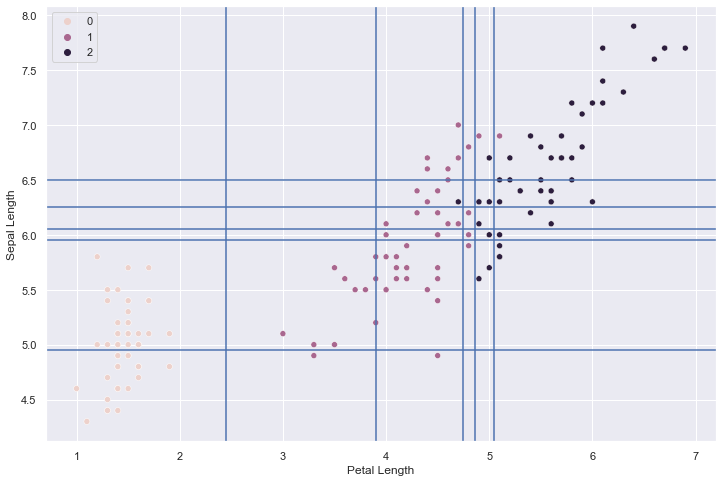

In [75]:
show(XX, yy)

# Мы добились небольшого успеха

/Users/pasha/Documents/Conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


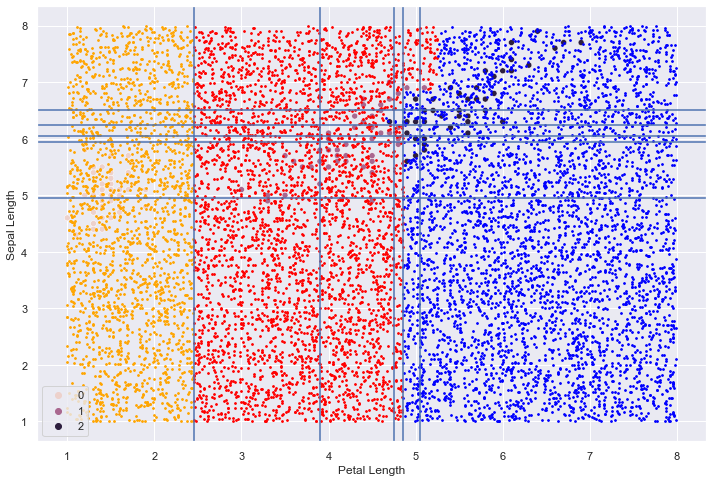

In [81]:
model = DecisionTreeClassifier()
model.fit(XX, yy)
draw(XX, model, yy)

### Но правильный подход это, конечно же, выбирать тьюнинг параметр: глубину дерева или количество соседей, через кроссвалидацию... или брать подмножество данных, или как то еще. Соответственно, надо построить много деревьев и сравновать их перфоманс на разных сэмплах, это и называется ЛЕС.

### Но прежде чем мы перейдем к этому, поучимся еще рисовать собственно деревья

In [82]:
from sklearn.datasets import load_iris
from sklearn import tree

from sklearn import datasets

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target

model = DecisionTreeClassifier()
fit = model.fit(X,y)

In [83]:
#!pip install graphviz

In [84]:
import graphviz 
sig(tree.export_graphviz)

<Signature (decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')>

In [85]:
dot_data = tree.export_graphviz(fit, out_file=None, feature_names=iris.feature_names, 
                                class_names=iris.target_names, 
                                filled=True, 
                                rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

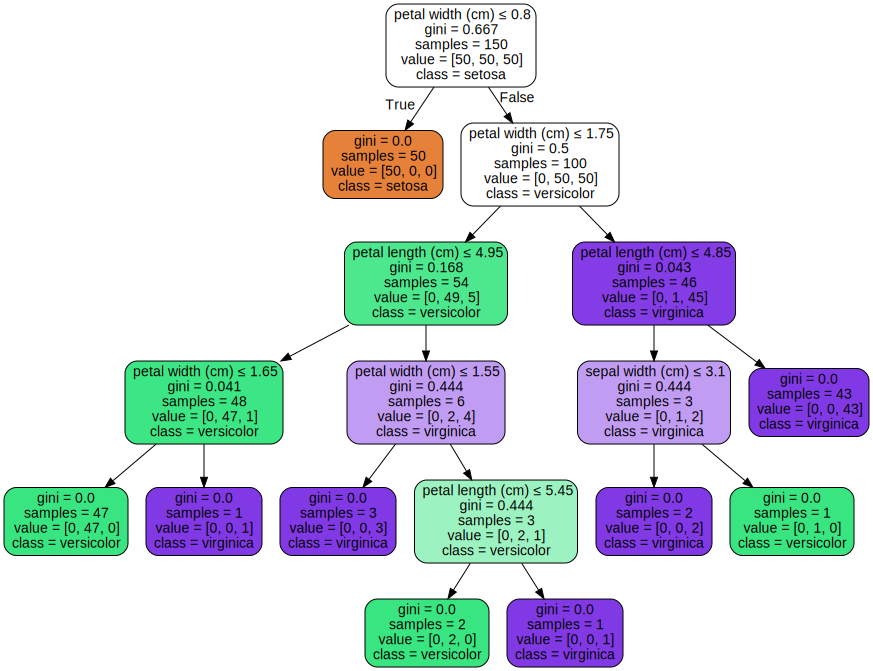

In [86]:
graph

### Итак, что такое случайный лес? (random forest)
- каждое дерево растет из своего сэмпла (bagging) примерно 50% данных
- каждое дерево имеет случайное подмножество переменных (для ускорения)
- каждое дерево независимо предсказывает класс
- деревья голосуют совместно
- это совместное голосование и есть основной результат случайного леса

### Почему было сделано именно так? Я не знаю, кто то попробовал, всем понравилось.

In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, verbose=1, n_jobs=16, random_state = 42, n_estimators=10000)
fit = model.fit(XX, y)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    1.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    3.8s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:    4.8s
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:    5.9s
[Parallel(n_jobs=16)]: Done 6018 tasks      | elapsed:    7.1s
[Parallel(n_jobs=16)]: Done 7168 tasks      | elapsed:    8.5s
[Parallel(n_jobs=16)]: Done 8418 tasks      | elapsed:   10.0s
[Parallel(n_jobs=16)]: Done 9768 tasks      | elapsed:   11.6s
[Parallel(n_jobs=16)]: Done 10000 out of

In [96]:
sig(RandomForestClassifier)

<Signature (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)>

In [97]:
print(fit.predict([[1, 1]]))

/Users/pasha/Documents/Conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done

[0]


[Parallel(n_jobs=16)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=16)]: Done 10000 out of 10000 | elapsed:    1.1s finished


In [98]:
print(fit.feature_importances_)

[0.69306752 0.30693248]


### Teперь проверим как лес справляется с нашей задачей

/Users/pasha/Documents/Conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:    1.5s
[Parallel(n_jobs=16)]: Done 6018 tasks      | elapsed:    1.8s
[Parallel(n_jobs=16)]: Done

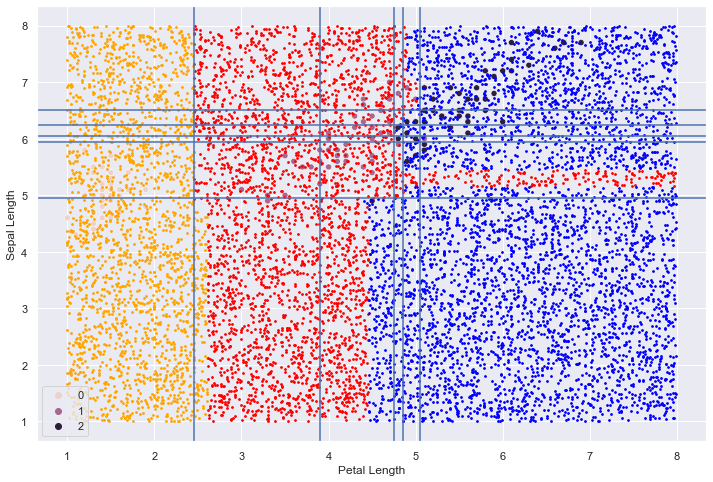

In [99]:
draw(XX, model, y)